In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('Surface_Drinking_Water_Importance__Feature_Layer_.csv')
us_geo = gpd.read_file('images/us_geo.json')

In [5]:
def huc_area(df, lower_lim, upper_lim): # -> dataframe, int, int
    #defines an region with the hydrologic unit code
    #returns a DataFrame with that area
    df_state = df[(df['HUC_12'] >= lower_lim*1000000000) & (df['HUC_12'] < upper_lim*1000000000)]
    return df_state


def pop_total(df, lower_lim, upper_lim): # -> dataframe, int, int
    #returns a population served with the defined region of HUC's
    return df[(df['HUC_12'] >= lower_lim*1000000000) & (df['HUC_12'] < upper_lim*1000000000) & (df['POPSERVED']>0)]


In [9]:
df_co = df[(df['HUC_12'] >= 140000000000) & (df['HUC_12'] < 160000000000) & (df['IMP1'] > 0)]
df_co

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_PRONF2,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN
56476,140300030402,McKee Draw,20,15.40,10.80,9.20,4.60,0.00000,1.41372,14.59920,...,54,46,23,0.00,9.18,94.80,257117,0,0.004777,0.382179
56477,140300030403,Callan Draw,21,18.90,15.75,8.82,3.15,1.82196,6.78321,17.39745,...,75,42,15,9.64,35.89,92.05,257118,0,0.005458,0.436415
56478,140300030404,McKee Draw-Naturita Creek,25,22.75,21.75,11.00,1.00,1.72900,0.00000,18.92800,...,87,44,4,7.60,0.00,83.20,257119,0,0.004728,0.419833
56479,140300030405,Headwaters Maverick Draw,54,32.40,5.94,2.70,26.46,0.00000,3.18168,29.21832,...,11,5,49,0.00,9.82,90.18,257120,1700,0.012474,0.702822
56480,140300030406,Outlet Maverick Draw,20,10.40,5.40,0.00,5.00,0.00000,0.32656,10.21696,...,27,0,25,0.00,3.14,98.24,257121,0,0.006414,0.488174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72009,150702030702,Garcia Well-San Cristobal Wash,17,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0,0.00,0.00,0.00,272650,0,0.011781,0.667886
72010,150702030703,Town of Dateland,18,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0,0.00,0.00,0.00,272651,0,0.008295,0.480567
72011,150702030704,Pimeria Well-San Cristobal Wash,18,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0,0.00,0.00,0.00,272652,0,0.020690,0.868747
72012,150702030705,Town of Stoval-San Cristobal Wash,19,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0,0.00,99.99,0.00,272653,0,0.006717,0.498573


In [10]:
pop = df[(df['HUC_12'] >= 140000000000) & (df['HUC_12'] < 160000000000) & (df['POPSERVED']>0)]


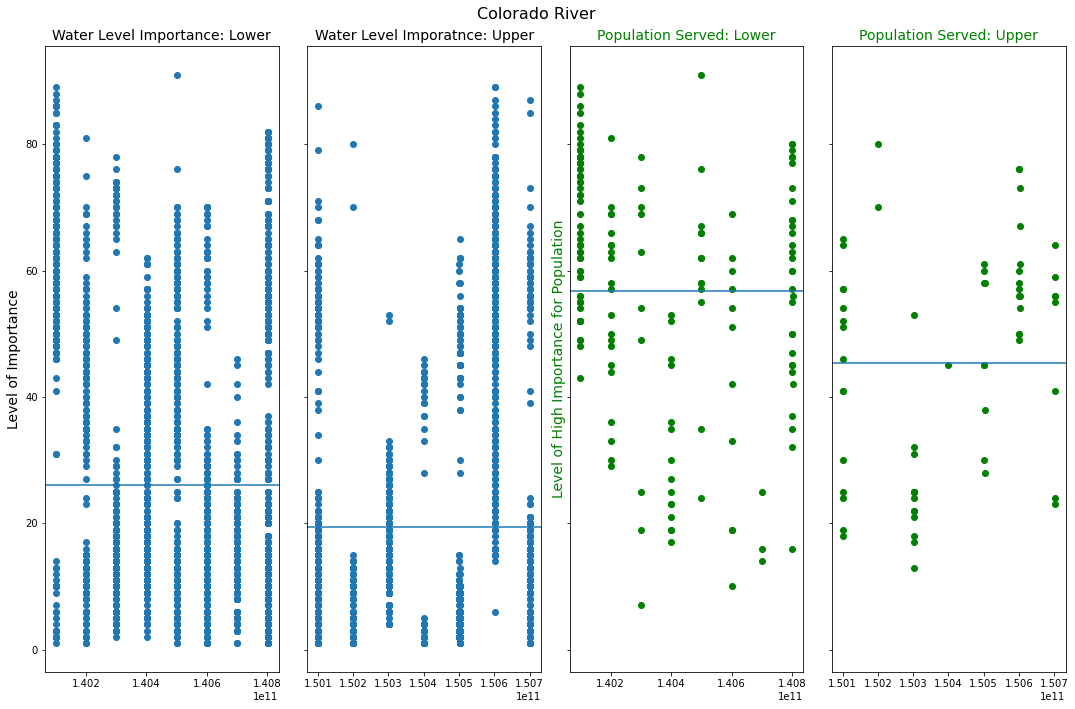

In [11]:
fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1']
df_lower = df_co.loc[df_co['HUC_12'] < 150000000000, 'HUC_12']
df_imp1 = df_co.loc[df_co['HUC_12'] >= 150000000000,'IMP1']
df_upper = df_co.loc[df_co['HUC_12'] >= 150000000000, 'HUC_12']
ax[0].scatter(df_lower, df_imp0)
ax[1].scatter(df_upper, df_imp1)
ax[0].set_title('Water Level Importance: Lower', size=14)
ax[1].set_title('Water Level Imporatnce: Upper', size=14)
ax[0].set_ylabel('Level of Importance', size=14)
co_mean = df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1'].mean()
co_mean1 = df_imp0 = df_co.loc[df_co['HUC_12'] > 150000000000,'IMP1'].mean()
ax[0].axhline(co_mean)
ax[1].axhline(co_mean1)


df_pop0 = pop.loc[pop['HUC_12'] < 150000000000,'IMP1']
df_lower_pop = pop.loc[pop['HUC_12'] < 150000000000, 'HUC_12']
df_pop1 = pop.loc[pop['HUC_12'] >= 150000000000,'IMP1']
df_upper_pop = pop.loc[pop['HUC_12'] >= 150000000000, 'HUC_12']
ax[2].scatter(df_lower_pop, df_pop0, color='green')
ax[3].scatter(df_upper_pop, df_pop1, color='green')
ax[2].set_title('Population Served: Lower', size=14, color='green')
ax[3].set_title('Population Served: Upper', size=14, color='green')
ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
pop_mean = pop.loc[pop['HUC_12'] < 150000000000,'IMP1'].mean()
pop_mean1 = pop.loc[pop['HUC_12'] > 150000000000,'IMP1'].mean()
ax[2].axhline(pop_mean)
ax[3].axhline(pop_mean1)
plt.suptitle('Colorado River', size=16)
plt.tight_layout()



In [12]:
#what's the difference between the importance level and the importance level for the population? 
#Also, how does the forest in these areas with the population served affected by the threats?

In [33]:
def pop_served_graphs_upper_lower(mid_lim, name_label, pop, huc_area): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
    df_imp0 = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000,'IMP1']
    df_lower = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_lower = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_imp1 = huc_area.loc[huc_area['HUC_12'] >= mid_lim*1000000000,'IMP1']
    df_upper = huc_area.loc[huc_area['HUC_12'] >= mid_lim*1000000000, 'HUC_12']
    ax[0].scatter(df_lower, df_imp0)
    ax[1].scatter(df_upper, df_imp1)
    ax[0].set_title('Water Level Importance: Lower', size=14)
    ax[1].set_title('Water Level Imporatnce: Upper', size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    co_mean = df_imp0 = df_co.loc[df_co['HUC_12'] < mid_lim*1000000000,'IMP1'].mean()
    co_mean1 = df_imp0 = df_co.loc[df_co['HUC_12'] > mid_lim*1000000000,'IMP1'].mean()
    ax[0].axhline(co_mean)
    ax[1].axhline(co_mean1)


    df_pop0 = pop.loc[pop['HUC_12'] < mid_lim*1000000000,'IMP1']
    df_lower_pop = pop.loc[pop['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_pop1 = pop.loc[pop['HUC_12'] >= mid_lim*1000000000,'IMP1']
    df_upper_pop = pop.loc[pop['HUC_12'] >= mid_lim*1000000000, 'HUC_12']
    ax[2].scatter(df_lower_pop, df_pop0, color='green')
    ax[3].scatter(df_upper_pop, df_pop1, color='green')
    ax[2].set_title('Population Served: Lower', size=14, color='green')
    ax[3].set_title('Population Served: Upper', size=14, color='green')
    ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop.loc[pop['HUC_12'] < mid_lim*1000000000,'IMP1'].mean()
    pop_mean1 = pop.loc[pop['HUC_12'] > mid_lim*1000000000,'IMP1'].mean()
    ax[2].axhline(pop_mean)
    ax[3].axhline(pop_mean1)
    plt.suptitle('Colorado River', size=16)
    plt.tight_layout()
    ax

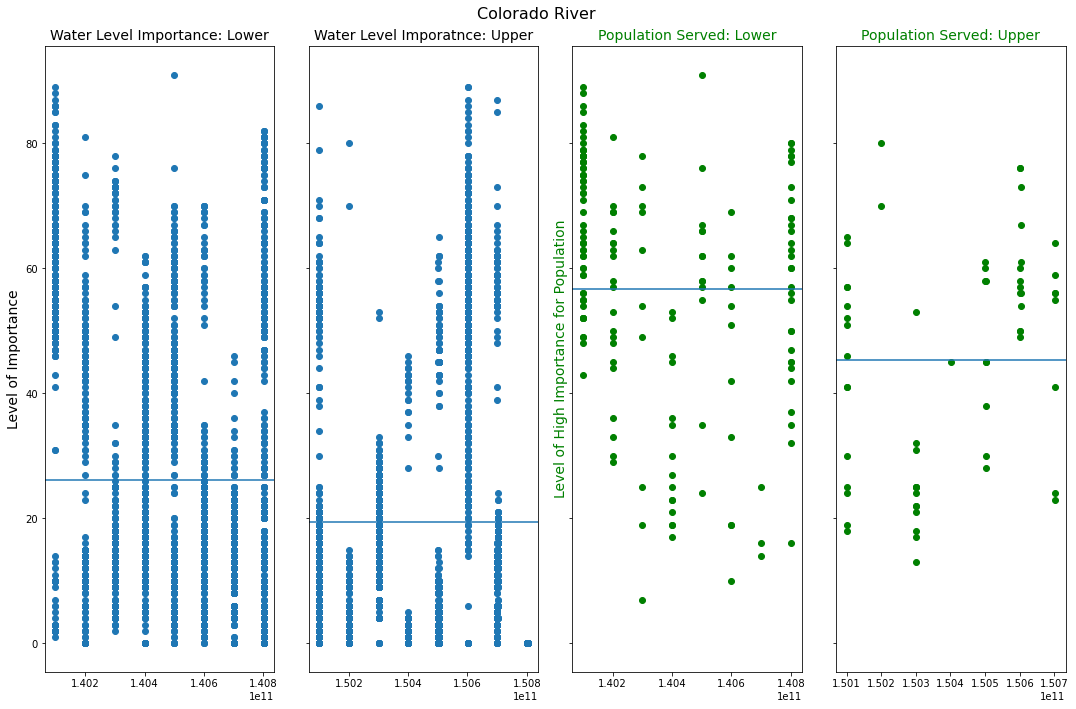

In [34]:
test_co = huc_area(df, 140, 160)
test_pop = pop_total(df, 140, 160)
pop_served_graphs_upper_lower(150, 'Colorado River', test_pop, test_co)

In [ ]:
# sum the threaten rows of fire, development and insect/disease 